In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

** Get the input data  and save into X and Y matrices **

In [148]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')

def matrix (inputarray):
    '''
    Takes numpy arrays of size m x n+1, where m is the number of rows and n is the number columns in X (not including x0)
    and the last column of the array is the Y vector. e.g.: x1,x2,...,xn, Y and then returns two numpy arrays:
         - X: X0,X1,X2,...,Xn where X0 is the ones vector size m
         - Y: Y 
    '''
    m = inputarray.shape[0]
    n = inputarray.shape[1]-1
    
    xones = np.ones((m,1)).reshape(m,1) # Reshape to make sure it is a column
    X = inputarray[:,0:n] # Matrix x1 to xn, note is the matrix wihtout x0
    X = np.c_[xones,X] # Maxtrix X, the matrix x0, x1, ... xn
    
    y = inputarray[:,-1]
    
    return X, y

X = matrix(data)[0]
y = matrix(data)[1]

** Visualise Data **

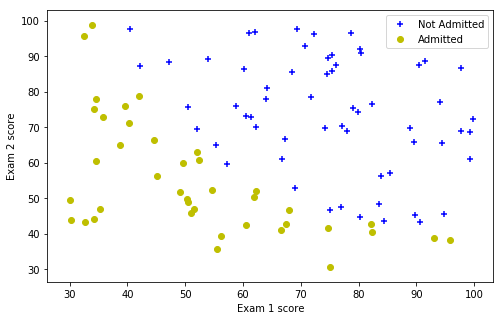

In [149]:
pos = np.where(y == 1)[0] # Creates a vector with the positions where y=1, admitted
neg = np.where(y == 0)[0] # Creates a vector with the positions where y=0, not admitted

plt.figure(figsize=(8,5))
plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='o', c='y')


plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])

plt.show()

** Define the Sigmoid function **
\begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}

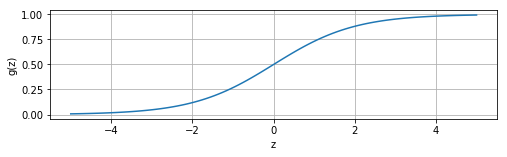

In [150]:
def sig (z):
    '''
    Takes scalar or np.array to calculate the element-wise sigmoid function and returns scalar or np.array
    '''
    return 1/(1+np.exp(-z))

sigX =  np.linspace(-5,5,100)
sigY =  sig(sigX)

plt.figure(figsize=(8,2))
plt.plot(sigX,sigY)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)

plt.show()



** Cost Function **

In [ ]:
def cost (theta,X,y):
    h0 = sig(X @ theta)
    m = y.shape[0]
    cost = (- y.conj().T @ np.log(h0) - (1-y.conj().T) @ np.log(1-h0))/m 
    return cost

In [162]:
theta = np.zeros((3,1))
print(cost(theta,X,y))

theta = np.array([[-24],[0.2],[0.2]])
print(cost (theta,X,y))

[0.69314718]
[0.21833019]


** Gradient Function **

In [ ]:
def grad(theta,X,y):
    m = X.shape[0]
    h0 = sig(X @ theta)
    grad = X.T @ (h0 - y) / m
    return grad

** Solver Minimization **

In [186]:
theta = np.zeros((3,1))
result1 = minimize(fun=cost, x0= theta, args = (X,y), method ='BFGS', jac=grad).x

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [178]:
result1

array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [181]:
theta = np.zeros((3,1))
result2 = minimize(fun=cost, x0= theta, args = (X,y), method ='TNC', jac=grad).x

In [183]:
result2

array([-25.16131869,   0.20623159,   0.20147149])

In [187]:
result1 - result2

array([-1.41466802e-05,  1.08280788e-07,  1.15793294e-07])